In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import loadmat
import os
import seaborn as sns
from scipy import stats
import sys
sys.path.append('..')
from madule import simulation
from madule import plots
from statsmodels.stats.anova import AnovaRM

In [2]:
# read collected data across data
behAll = pd.read_csv('/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/AllBehData/behAll.csv')
# rearrange trial number
behAll['trialNumber'].replace(
       [44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,
        58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85],
       [2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
        30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43], inplace=True)

# Find maximum and minimum for each trial
winAmtMax = np.maximum(behAll['winAmtLeft'], behAll['winAmtRight'])
behAll['winAmtMax'] = winAmtMax
winAmtMin = np.minimum(behAll['winAmtLeft'], behAll['winAmtRight'])
behAll['winAmtMin'] = winAmtMin
# Find chosen win amount for each trial
chosenAmount = behAll['leftChosen']*behAll['winAmtLeft'] + (1-behAll['leftChosen'])*behAll['winAmtRight'] 
behAll['chosenWinAmt'] = chosenAmount

# Take color or action value learning, one and two reversal point
reverse = 21
block = 'Stim'
behAllCond = behAll.loc[(behAll['block']==block)&(behAll['reverse']==reverse)]


In [14]:
"""Diagnosis effect"""
# Averaging Across participants for each trial
behAllCond_winAmtMax = behAllCond.groupby(['sub_ID', 'patient', 'trialNumber'], as_index=False)['winAmtMax'].sum()
behAllCond_winAmtMax_mean = behAllCond_winAmtMax.groupby(['patient', 'trialNumber'], as_index=False)['winAmtMax'].mean()
behAllCond_winAmtMax_std = behAllCond_winAmtMax.groupby(['patient', 'trialNumber'], as_index=False)['winAmtMax'].std()

behAllCond_winAmtMin = behAllCond.groupby(['sub_ID', 'patient', 'trialNumber'], as_index=False)['winAmtMin'].sum()
behAllCond_winAmtMin_mean = behAllCond_winAmtMin.groupby(['patient', 'trialNumber'], as_index=False)['winAmtMin'].mean()
behAllCond_winAmtMin_std = behAllCond_winAmtMin.groupby(['patient', 'trialNumber'], as_index=False)['winAmtMin'].std()

behAllCond_winAmtMin_chosedWinAmt= behAllCond.groupby(['sub_ID', 'patient', 'trialNumber'], as_index=False)['chosenWinAmt'].sum()
behAllCond_winAmtMin_chosedWinAmt_mean= behAllCond_winAmtMin_chosedWinAmt.groupby(['patient', 'trialNumber'], as_index=False)['chosenWinAmt'].mean()
behAllCond_winAmtMin_chosedWinAmt_std= behAllCond_winAmtMin_chosedWinAmt.groupby(['patient', 'trialNumber'], as_index=False)['chosenWinAmt'].std()

# Window size for moving average
window_size = 4

"""Parkinson's disease"""
# maximum win amount for each trial and moving average
x_1_PD = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['patient']=='PD']['trialNumber'] -1
mean_1_PD = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['patient']=='PD']['winAmtMax']
std_1_PD = behAllCond_winAmtMax_std[behAllCond_winAmtMax_std['patient']=='PD']['winAmtMax']
windows_mean_1_PD = mean_1_PD.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_PD = windows_mean_1_PD.mean()

# minimum win amount for each trial and moving average
x_2_PD = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['patient']=='PD']['trialNumber'] -1
mean_2_PD = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['patient']=='PD']['winAmtMin']
std_2_PD = behAllCond_winAmtMin_std[behAllCond_winAmtMin_std['patient']=='PD']['winAmtMin']
windows_mean_2_PD = mean_2_PD.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_PD = windows_mean_2_PD.mean()

# Chosen win amount for each trial and moving average
x_3_PD = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['patient']=='PD']['trialNumber'] -1
mean_3_PD = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['patient']=='PD']['chosenWinAmt']
std_3_PD= behAllCond_winAmtMin_chosedWinAmt_std[behAllCond_winAmtMin_chosedWinAmt_std['patient']=='PD']['chosenWinAmt']
windows_mean_3_PD = mean_3_PD.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_PD = windows_mean_3_PD.mean()

"""Healthy Control"""
# maximum win amount for each trial and moving average
x_1_HC = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['patient']=='HC']['trialNumber'] -1
mean_1_HC = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['patient']=='HC']['winAmtMax']
windows_mean_1_HC = mean_1_HC.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_HC = windows_mean_1_HC.mean()
  
# minimum win amount for each trial and moving average
x_2_HC = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['patient']=='HC']['trialNumber'] -1
mean_2_HC = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['patient']=='HC']['winAmtMin']
windows_mean_2_HC = mean_2_HC.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_HC = windows_mean_2_HC.mean()

# Chosen win amount for each trial and moving average
x_3_HC = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['patient']=='PD']['trialNumber'] -1
mean_3_HC = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['patient']=='HC']['chosenWinAmt']
windows_mean_3_HC = mean_3_HC.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_HC = windows_mean_3_HC.mean()


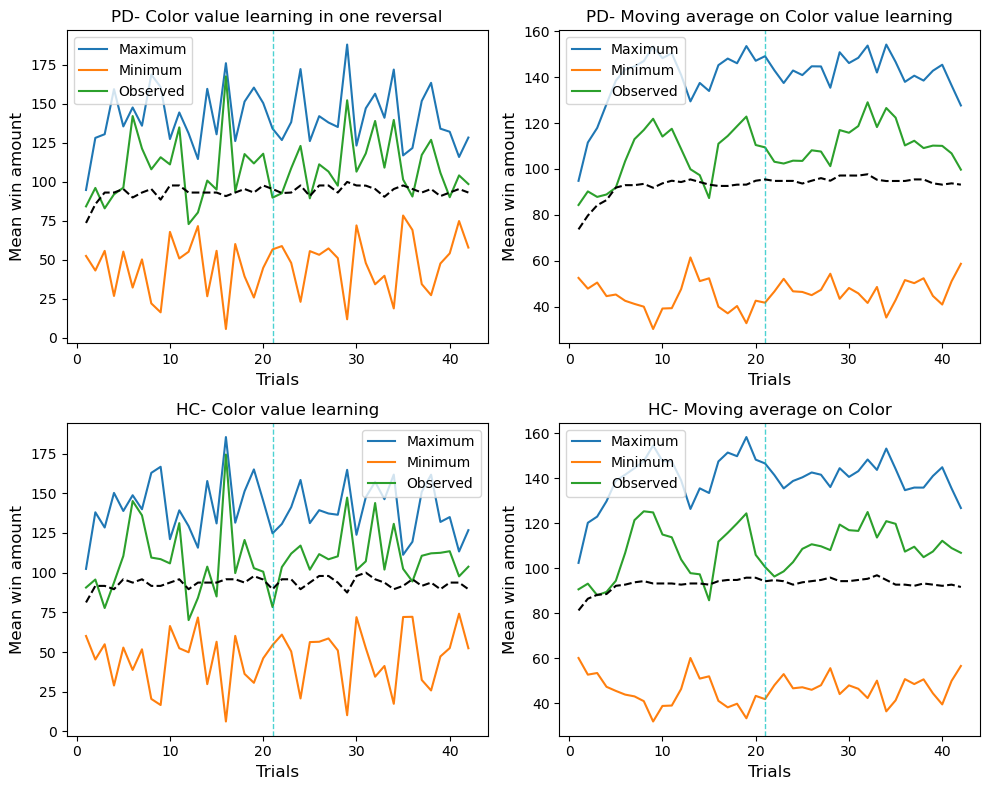

In [15]:
fig = plt.figure(figsize=(10,8), tight_layout=True)
row = 2
column = 2

fig.add_subplot(row, column, 1)
plt.plot(x_1_PD, mean_1_PD)
plt.plot(x_2_PD, mean_2_PD)
plt.plot(x_3_PD, mean_3_PD)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_PD, np.mean([mean_1_PD, mean_2_PD], axis=0), color='black' , linestyle='--')
plt.title('PD- Color value learning in one reversal')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])

fig.add_subplot(row, column, 2)
plt.plot(x_1_PD, moving_averages_mean_1_PD)
plt.plot(x_2_PD, moving_averages_mean_2_PD)
plt.plot(x_3_PD, moving_averages_mean_3_PD)
#plt.fill_between(x_1, moving_averages_mean_1 - std_1, moving_averages_mean_1 + std_1, color='b', alpha=0.2)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_PD, np.mean([moving_averages_mean_1_PD, moving_averages_mean_2_PD], axis=0), color='black' , linestyle='--')
plt.title('PD- Moving average on Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])


fig.add_subplot(row, column, 3)
plt.plot(x_1_PD, mean_1_HC)
plt.plot(x_2_PD, mean_2_HC)
plt.plot(x_3_PD, mean_3_HC)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_PD, np.mean([mean_1_HC, mean_2_HC], axis=0), color='black' , linestyle='--')
plt.title('HC- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])

fig.add_subplot(row, column, 4)
plt.plot(x_1_HC, moving_averages_mean_1_HC)
plt.plot(x_2_HC, moving_averages_mean_2_HC)
plt.plot(x_3_HC, moving_averages_mean_3_HC)
#plt.fill_between(x_1, moving_averages_mean_1 - std_1, moving_averages_mean_1 + std_1, color='b', alpha=0.2)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_HC, np.mean([moving_averages_mean_1_HC, moving_averages_mean_2_HC], axis=0), color='black' , linestyle='--')
plt.title('HC- Moving average on Color')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])


In [5]:
"""Medication effect"""
# Averaging Across participants for each trial
behAllCond_winAmtMax = behAllCond.groupby(['sub_ID', 'group', 'trialNumber'], as_index=False)['winAmtMax'].sum()
behAllCond_winAmtMax_mean = behAllCond_winAmtMax.groupby(['group', 'trialNumber'], as_index=False)['winAmtMax'].mean()
behAllCond_winAmtMax_std = behAllCond_winAmtMax.groupby(['group', 'trialNumber'], as_index=False)['winAmtMax'].std()

behAllCond_winAmtMin = behAllCond.groupby(['sub_ID', 'group', 'trialNumber'], as_index=False)['winAmtMin'].sum()
behAllCond_winAmtMin_mean = behAllCond_winAmtMin.groupby(['group', 'trialNumber'], as_index=False)['winAmtMin'].mean()
behAllCond_winAmtMin_std = behAllCond_winAmtMin.groupby(['group', 'trialNumber'], as_index=False)['winAmtMin'].std()

behAllCond_winAmtMin_chosedWinAmt= behAllCond.groupby(['sub_ID', 'group', 'trialNumber'], as_index=False)['chosenWinAmt'].sum()
behAllCond_winAmtMin_chosedWinAmt_mean= behAllCond_winAmtMin_chosedWinAmt.groupby(['group', 'trialNumber'], as_index=False)['chosenWinAmt'].mean()
behAllCond_winAmtMin_chosedWinAmt_std= behAllCond_winAmtMin_chosedWinAmt.groupby(['group', 'trialNumber'], as_index=False)['chosenWinAmt'].std()

# Window size for moving average
window_size = 5

"""Group 1"""
# maximum win amount for each trial and moving average
x_1_g1 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==1]['trialNumber'] -1
mean_1_g1 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==1]['winAmtMax']
windows_mean_1_g1 = mean_1_g1.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_g1 = windows_mean_1_g1.mean()

# minimum win amount for each trial and moving average
x_2_g1 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==1]['trialNumber'] -1
mean_2_g1 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==1]['winAmtMin']
windows_mean_2_g1 = mean_2_g1.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_g1 = windows_mean_2_g1.mean()

# Chosen win amount for each trial and moving average
x_3_g1 = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['group']==1]['trialNumber'] -1
mean_3_g1 = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['group']==1]['chosenWinAmt']
windows_mean_3_g1 = mean_3_g1.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_g1 = windows_mean_3_g1.mean()

"""Group 2"""
# maximum win amount for each trial and moving average
x_1_g3 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==3]['trialNumber'] -1
mean_1_g3 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['group']==3]['winAmtMax']
windows_mean_1_g3 = mean_1_g3.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_g3 = windows_mean_1_g3.mean()

# minimum win amount for each trial and moving average
x_2_g3 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==3]['trialNumber'] -1
mean_2_g3 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['group']==3]['winAmtMin']
windows_mean_2_g3 = mean_2_g3.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_g3 = windows_mean_2_g3.mean()

# Chosen win amount for each trial and moving average
x_3_g3 = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['group']==3]['trialNumber'] -1
mean_3_g3 = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['group']==3]['chosenWinAmt']
windows_mean_3_g3 = mean_3_g3.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_g3 = windows_mean_3_g3.mean()


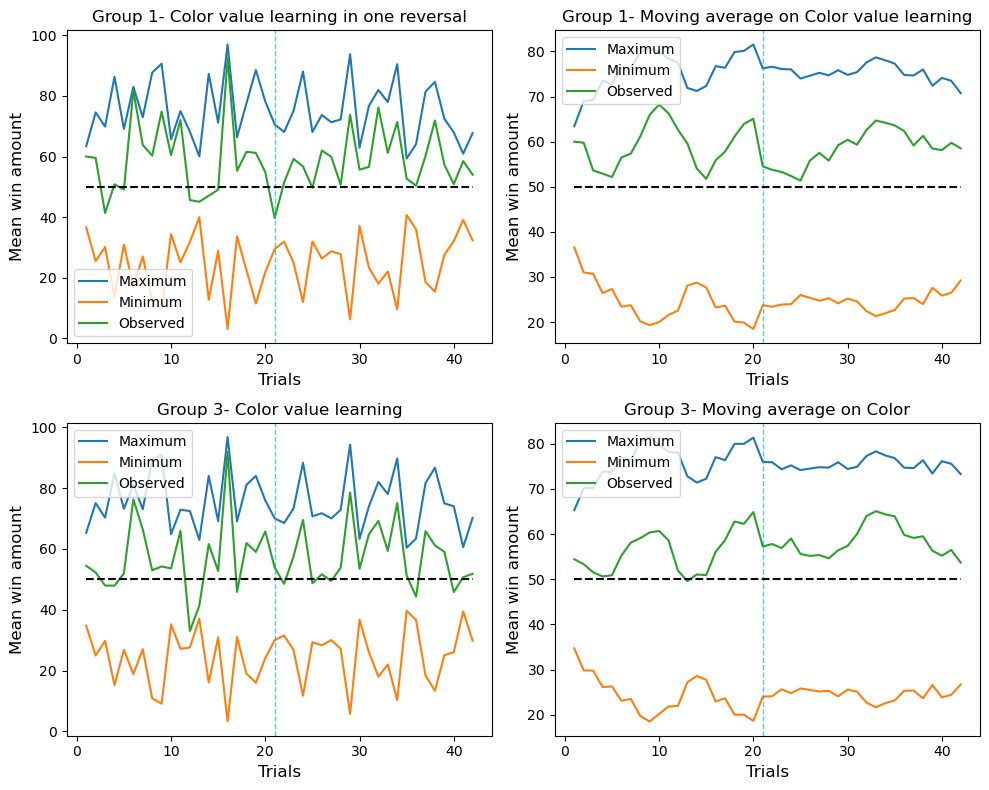

In [6]:
fig = plt.figure(figsize=(10,8), tight_layout=True)
row = 2
column = 2

fig.add_subplot(row, column, 1)
plt.plot(x_1_g1, mean_1_g1)
plt.plot(x_2_g1, mean_2_g1)
plt.plot(x_3_g1, mean_3_g1)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g1, np.mean([mean_1_g1, mean_2_g1], axis=0), color='black' , linestyle='--')
plt.title('Group 1- Color value learning in one reversal')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])

fig.add_subplot(row, column, 2)
plt.plot(x_1_g1, moving_averages_mean_1_g1)
plt.plot(x_2_g1, moving_averages_mean_2_g1)
plt.plot(x_3_g1, moving_averages_mean_3_g1)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g1, np.mean([moving_averages_mean_1_g1, moving_averages_mean_2_g1], axis=0), color='black' , linestyle='--')
plt.title('Group 1- Moving average on Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])


fig.add_subplot(row, column, 3)
plt.plot(x_1_g3, mean_1_g3)
plt.plot(x_2_g3, mean_2_g3)
plt.plot(x_3_g3, mean_3_g3)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g3, np.mean([mean_1_g3, mean_2_g3], axis=0), color='black' , linestyle='--')
plt.title('Group 3- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])

fig.add_subplot(row, column, 4)
plt.plot(x_1_g3, moving_averages_mean_1_g3)
plt.plot(x_2_g3, moving_averages_mean_2_g3)
plt.plot(x_3_g3, moving_averages_mean_3_g3)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_g3, np.mean([moving_averages_mean_1_g3, moving_averages_mean_2_g3], axis=0), color='black' , linestyle='--')
plt.title('Group 3- Moving average on Color')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])


In [7]:
"""Repetition Effect"""
# Averaging Across participants for each trial
behAllCond_winAmtMax = behAllCond.groupby(['sub_ID', 'session', 'trialNumber'], as_index=False)['winAmtMax'].sum()
behAllCond_winAmtMax_mean = behAllCond_winAmtMax.groupby(['session', 'trialNumber'], as_index=False)['winAmtMax'].mean()
behAllCond_winAmtMax_std = behAllCond_winAmtMax.groupby(['session', 'trialNumber'], as_index=False)['winAmtMax'].std()

behAllCond_winAmtMin = behAllCond.groupby(['sub_ID', 'session', 'trialNumber'], as_index=False)['winAmtMin'].sum()
behAllCond_winAmtMin_mean = behAllCond_winAmtMin.groupby(['session', 'trialNumber'], as_index=False)['winAmtMin'].mean()
behAllCond_winAmtMin_std = behAllCond_winAmtMin.groupby(['session', 'trialNumber'], as_index=False)['winAmtMin'].std()

behAllCond_winAmtMin_chosedWinAmt= behAllCond.groupby(['sub_ID', 'session', 'trialNumber'], as_index=False)['chosenWinAmt'].sum()
behAllCond_winAmtMin_chosedWinAmt_mean= behAllCond_winAmtMin_chosedWinAmt.groupby(['session', 'trialNumber'], as_index=False)['chosenWinAmt'].mean()
behAllCond_winAmtMin_chosedWinAmt_std= behAllCond_winAmtMin_chosedWinAmt.groupby(['session', 'trialNumber'], as_index=False)['chosenWinAmt'].std()

# Window size for moving average
window_size = 5

"""Group 1"""
# maximum win amount for each trial and moving average
x_1_s1 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['session']==1]['trialNumber'] -1
mean_1_s1 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['session']==1]['winAmtMax']
windows_mean_1_s1 = mean_1_s1.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_s1 = windows_mean_1_s1.mean()

# minimum win amount for each trial and moving average
x_2_s1 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['session']==1]['trialNumber'] -1
mean_2_s1 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['session']==1]['winAmtMin']
windows_mean_2_s1 = mean_2_s1.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_s1 = windows_mean_2_s1.mean()

# Chosen win amount for each trial and moving average
x_3_s1 = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['session']==1]['trialNumber'] -1
mean_3_s1 = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['session']==1]['chosenWinAmt']
windows_mean_3_s1 = mean_3_s1.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_s1 = windows_mean_3_s1.mean()

"""Group 2"""
# maximum win amount for each trial and moving average
x_1_s2 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['session']==2]['trialNumber'] -1
mean_1_s2 = behAllCond_winAmtMax_mean[behAllCond_winAmtMax_mean['session']==2]['winAmtMax']
windows_mean_1_s2 = mean_1_s2.rolling(window=window_size, min_periods=1)
moving_averages_mean_1_s2 = windows_mean_1_s2.mean()

# minimum win amount for each trial and moving average
x_2_s2 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['session']==2]['trialNumber'] -1
mean_2_s2 = behAllCond_winAmtMin_mean[behAllCond_winAmtMin_mean['session']==2]['winAmtMin']
windows_mean_2_s2 = mean_2_s2.rolling(window=window_size, min_periods=1)
moving_averages_mean_2_s2 = windows_mean_2_s2.mean()

# Chosen win amount for each trial and moving average
x_3_s2 = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['session']==2]['trialNumber'] -1
mean_3_s2 = behAllCond_winAmtMin_chosedWinAmt_mean[behAllCond_winAmtMin_chosedWinAmt_mean['session']==2]['chosenWinAmt']
windows_mean_3_s2 = mean_3_s2.rolling(window=window_size, min_periods=1)
moving_averages_mean_3_s2 = windows_mean_3_s2.mean()


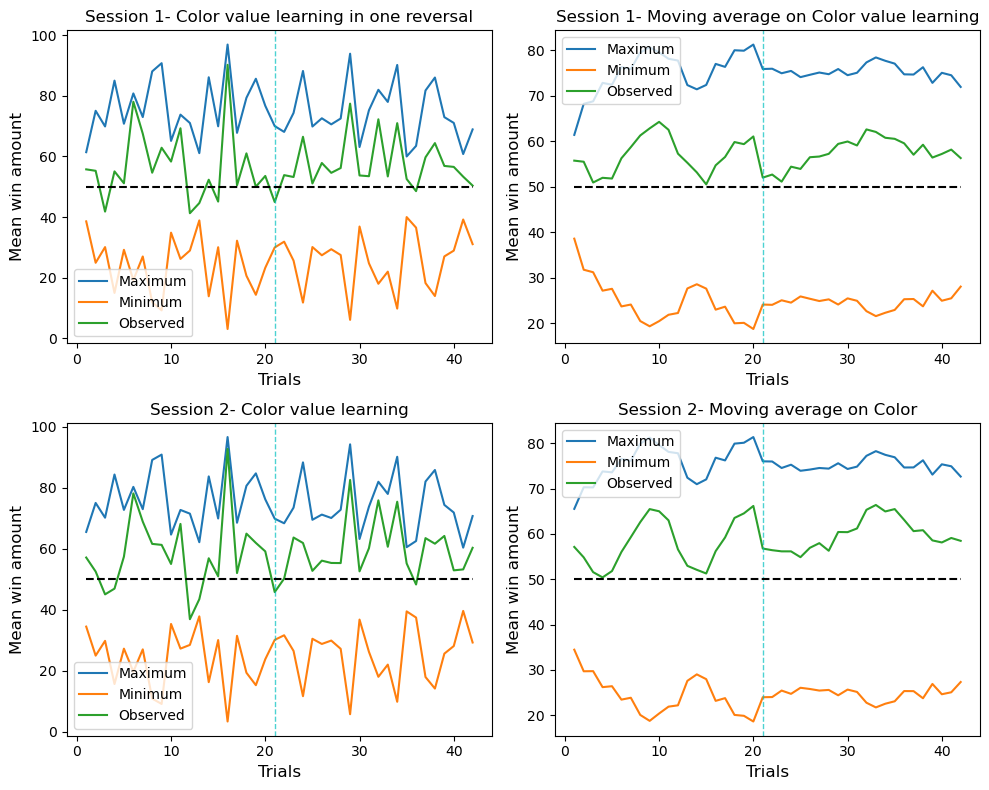

In [8]:
fig = plt.figure(figsize=(10,8), tight_layout=True)
row = 2
column = 2

fig.add_subplot(row, column, 1)
plt.plot(x_1_s1, mean_1_s1)
plt.plot(x_2_s1, mean_2_s1)
plt.plot(x_3_s1, mean_3_s1)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_s1, np.mean([mean_1_s1, mean_2_s1], axis=0), color='black' , linestyle='--')
plt.title('Session 1- Color value learning in one reversal')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])

fig.add_subplot(row, column, 2)
plt.plot(x_1_s1, moving_averages_mean_1_s1)
plt.plot(x_2_s1, moving_averages_mean_2_s1)
plt.plot(x_3_s1, moving_averages_mean_3_s1)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_s1, np.mean([moving_averages_mean_1_s1, moving_averages_mean_2_s1], axis=0), color='black' , linestyle='--')
plt.title('Session 1- Moving average on Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])


fig.add_subplot(row, column, 3)
plt.plot(x_1_s2, mean_1_s2)
plt.plot(x_2_s2, mean_2_s2)
plt.plot(x_3_s2, mean_3_s2)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_s2, np.mean([mean_1_s2, mean_2_s2], axis=0), color='black' , linestyle='--')
plt.title('Session 2- Color value learning')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])

fig.add_subplot(row, column, 4)
plt.plot(x_1_s2, moving_averages_mean_1_s2)
plt.plot(x_2_s2, moving_averages_mean_2_s2)
plt.plot(x_3_s2, moving_averages_mean_3_s2)
plt.axvline(x = 21, color='c', linestyle='--', linewidth=1, alpha=.7)
plt.plot(x_1_s2, np.mean([moving_averages_mean_1_s2, moving_averages_mean_2_s2], axis=0), color='black' , linestyle='--')
plt.title('Session 2- Moving average on Color')
plt.xlabel('Trials', fontsize='12')
plt.ylabel('Mean win amount', fontsize='12')
plt.legend(['Maximum', 'Minimum', 'Observed'])


In [11]:
# The likelihood of selecting maximum win amount so that they are also correct answer
if block=='Stim':
    nYellWinAmtMax = np.sum(behAllCond.winAmtYellow*behAllCond.yellowCorrect>=50)
    nBlueWinAmtMax = np.sum(behAllCond.winAmtBlue*(1-behAllCond.yellowCorrect)>=50)
    print((nYellWinAmtMax+nBlueWinAmtMax)/len(behAllCond))

0.4547486033519553


In [13]:
# The likelihood of selecting maximum win amount so that they are also correct answer
if block=='Act':
    nPushWinAmtMax = np.sum(behAllCond.winAmtPushable*behAllCond.pushCorrect>=50)
    nPullWinAmtMax = np.sum(behAllCond.winAmtPullable*(1-behAllCond.pushCorrect)>=50)
    print((nPushWinAmtMax+nPullWinAmtMax)/len(behAllCond))